Q1. What is the mathematical formula for a linear SVM?

The decision boundary of a linear Support Vector Machine (SVM) can be represented by the equation:

f(x)=w⋅x+b

where:
- w is the weight vector.
- x is the input vector.
- b is the bias term.

The goal of the linear SVM is to find the hyperplane (decision boundary) that maximizes the margin between the classes.

Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM consists of two parts:
1. Minimize the norm of the weight vector: This is to maximize the margin.

2. Penalty for misclassified points: This is added to handle cases where the data is not perfectly linearly separable (for soft margin SVM).



Q3. What is the kernel trick in SVM?
The kernel trick is a technique used in SVMs to handle non-linear decision boundaries. It involves mapping the original input space into a higher-dimensional feature space where a linear separator can be found. The kernel function K(xi, xj) implicitly computes the dot product of the data in this higher-dimensional space without explicitly performing the transformation.

Common kernel functions include:

- Linear Kernel: K(xi, xj)=xi ⋅ xj
- Polynomial Kernel: K(xi,xj)=(xi⋅xj+c)^d
- Gaussian (RBF) Kernel: K(xi,xj)=exp(-(∥xi-xj∥^2)/2σ^2)

Q4. What is the role of support vectors in SVM? Explain with an example.

Support vectors are the data points that are closest to the decision boundary (hyperplane). These points are critical because they define the position and orientation of the hyperplane. The margin of the SVM is determined by the distance from the hyperplane to these support vectors.

Example:
Consider a binary classification problem with two classes. The SVM will find a hyperplane that separates the classes. The data points that lie closest to this hyperplane are the support vectors. These points are crucial as moving them would change the position of the hyperplane, whereas moving any other points would not affect the hyperplane as much.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.

Here, we will generate some examples and graphs to illustrate these concepts.

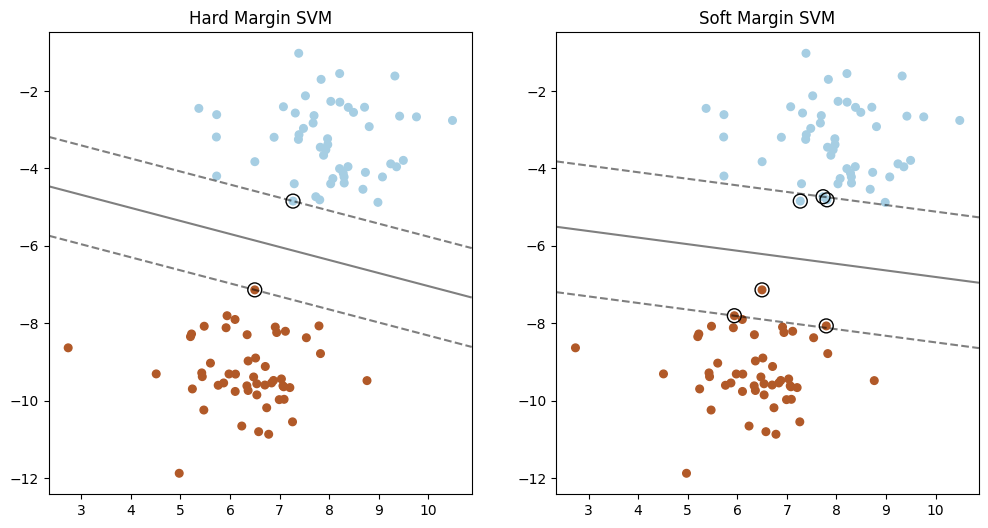

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Fit the SVM model
clf_hard = SVC(kernel='linear', C=1e10)  # Hard margin
clf_soft = SVC(kernel='linear', C=0.1)   # Soft margin
clf_hard.fit(X, y)
clf_soft.fit(X, y)

def plot_svm(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_svm(clf_hard, X, y, 'Hard Margin SVM')
plt.subplot(1, 2, 2)
plot_svm(clf_soft, X, y, 'Soft Margin SVM')
plt.show()


Q6. SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
-  Train a linear SVM classifier on the training set and predict the labels for the testing set.
- Compute the accuracy of the model on the testing set.
- Plot the decision boundaries of the trained model using two of the features.
- Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy: 0.73


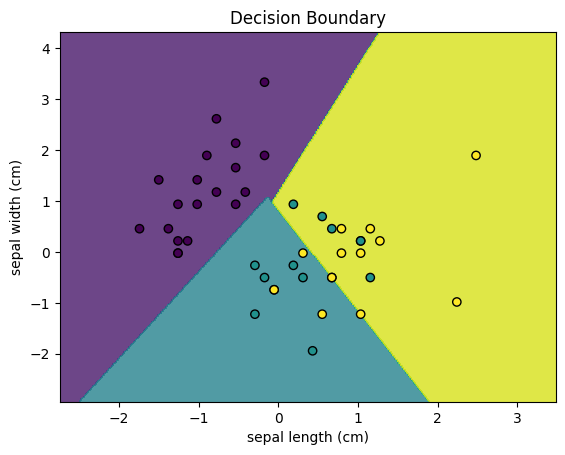

Accuracy with C=0.1: 0.82
Accuracy with C=1: 0.73
Accuracy with C=10: 0.80
Accuracy with C=100: 0.80


In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()

X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Statdardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict the lables for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries
def plot_decision_boundary(X, y, model):
  h = 0.02 # Step size in the mesh
  x_min, x_max = X[:, 0].min() -1, X[:,0].max()+1
  y_min, y_max = X[:, 1].min() -1, X[:,1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  plt.title("Decision Boundary")
  plt.show()

plot_decision_boundary(X_test, y_test, clf)


# Try different values of teh regularization parameters c
for C in [0.1, 1, 10, 100]:
  clf = SVC(kernel='linear', C=C)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy with C={C}: {accuracy:.2f}")

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

In [7]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Testing the implementation with Iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Convert to binary classification problem (class 0 vs. class 1 and 2)
y = np.where(y == 0, 0, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the custom linear SVM classifier
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Custom SVM Accuracy: {accuracy:.2f}")

# Compare with scikit-learn's SVM
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn SVM Accuracy: {accuracy_sklearn:.2f}")


Custom SVM Accuracy: 0.58
Scikit-learn SVM Accuracy: 1.00


Custom SVM Accuracy: 0.58
Scikit-learn SVM Accuracy: 1.00


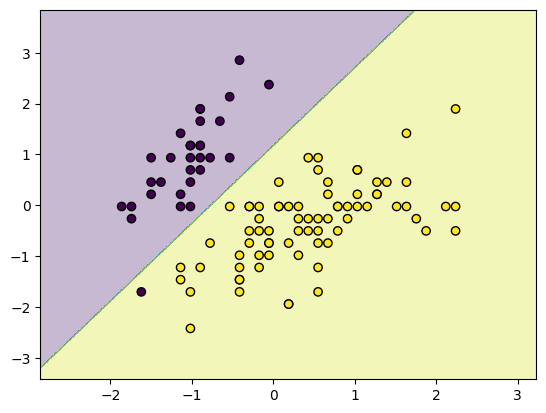

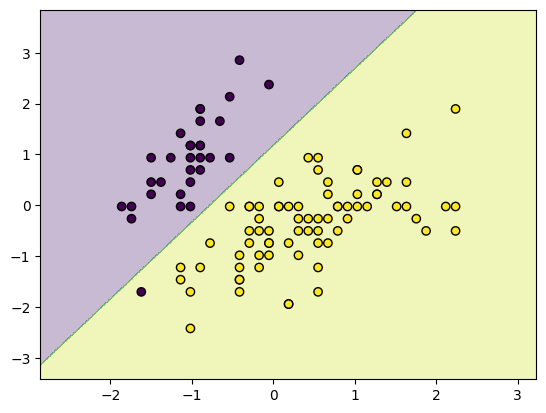

In [9]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Testing the implementation with Iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Convert to binary classification problem (class 0 vs. class 1 and 2)
y = np.where(y == 0, 0, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the custom linear SVM classifier
svm = LinearSVM(learning_rate=0.0001, lambda_param=0.01, n_iters=10000)
svm.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Custom SVM Accuracy: {accuracy:.2f}")

# Compare with scikit-learn's SVM
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn SVM Accuracy: {accuracy_sklearn:.2f}")

# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(X_train, y_train, svm)
plot_decision_boundary(X_train, y_train, clf)
